# 차원과 차원 축소

- 특성 : 데이터가 가진 속성
  - 이런 특성을 차원이라고도 부름
  

- 차원이 많으면 과대적합이 된다는 것을 배움
- **차원 축소**
  - 데이터 크기도 줄이고 지도 학습 모델의 성능 향상시킴


- **주성분 분석 (PCA)**

- 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원 가능

# 주성분 분석 소개

- 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해 가능
  - 분산 : 데이터가 널리 퍼져있는 정도
---
- 분산이 큰 방향의 벡터를 **주성분**이라 부름
  - 주성분을 통하여 차원을 줄일 수 있음

# PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-05-15 17:51:41--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-15 17:51:41--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-15 17:51:42--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [2]:
# 비지도 학습이기 때문에 target 값이 없음
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

- n_components 는 주성분 개수

In [3]:
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr) # n은 샘플 개수입니다.
  # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: # n개까지만 그립니다.
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

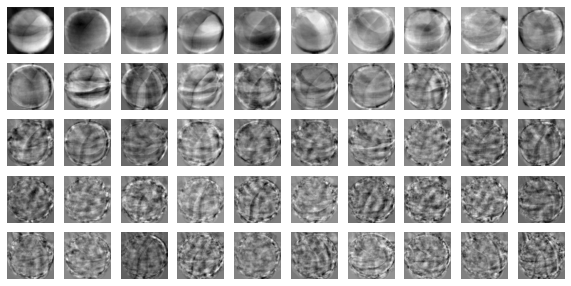

In [5]:
draw_fruits(pca.components_.reshape(-1,100,100))

- 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것임

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 차원을 성공적으로 줄인 것을 볼 수 있음

# 원본 데이터 재구성

In [8]:
# 재구성할 수 있음
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


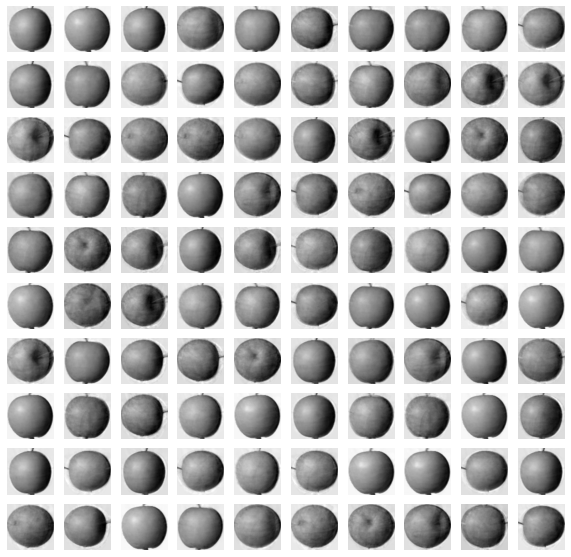

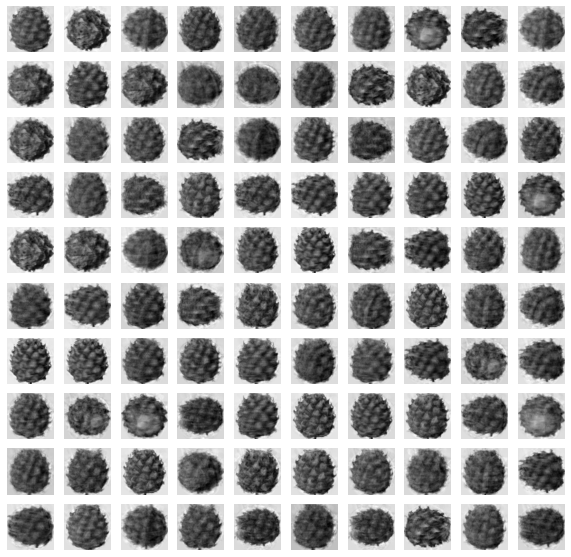

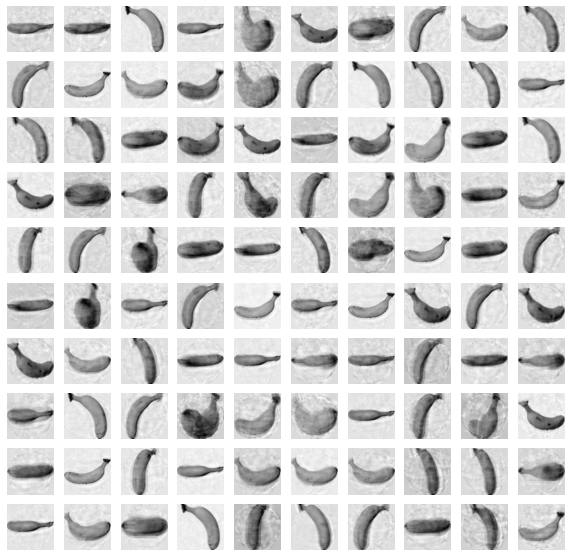

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

# 설명된 분산

- 주성분 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 말함
- 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [10]:
print(np.sum(pca.explained_variance_ratio_))

0.9215248082675837


- 92%가 넘는 분산을 유지하고 있음
  - 50개의 특성에서 복원했을 때 이미지의 품질이 높았던 이유를 볼 수 있음

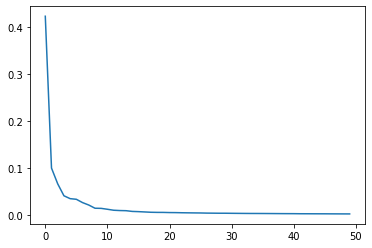

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현하고 있음

# 다른 알고리즘과 함께 사용하기

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [13]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [14]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.7421667575836182


- 99%의 정확도
  - 특성이 10,000개나 되기 때문에 과대적합이 된 모델임

In [15]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.050680017471313475


- 50개의 특성만 사용했는데 정확도 1에 시간도 축소됨

In [16]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [17]:
print(pca.n_components_)

2


- 분산의 50%을 표현하는 특성 개수가 2임

In [18]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [20]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04498224258422852


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


- 반복 횟수를 증가하라는 경고가 뜸
- 99% 정확도임

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


- pca로 찾은 클러스터는 91개, 99개, 110개의 샘플을 포함하고 있음

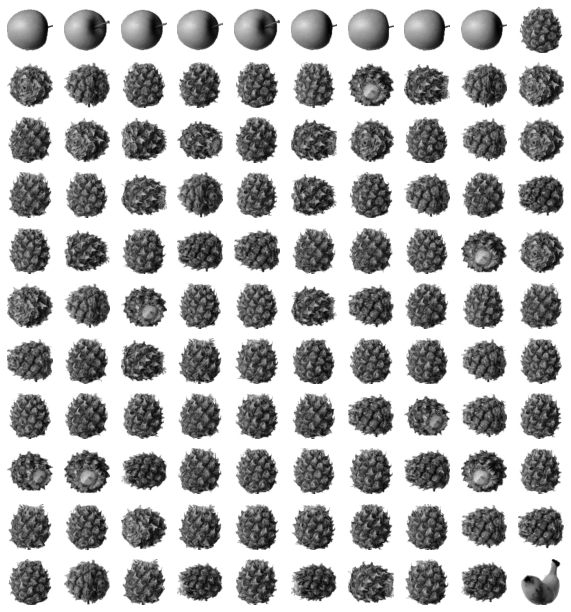

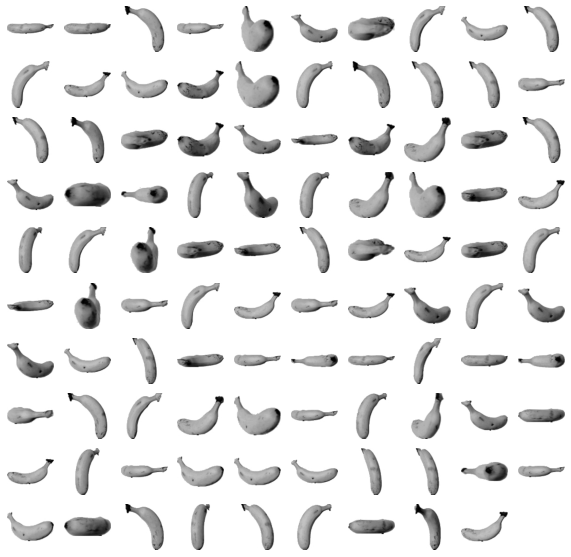

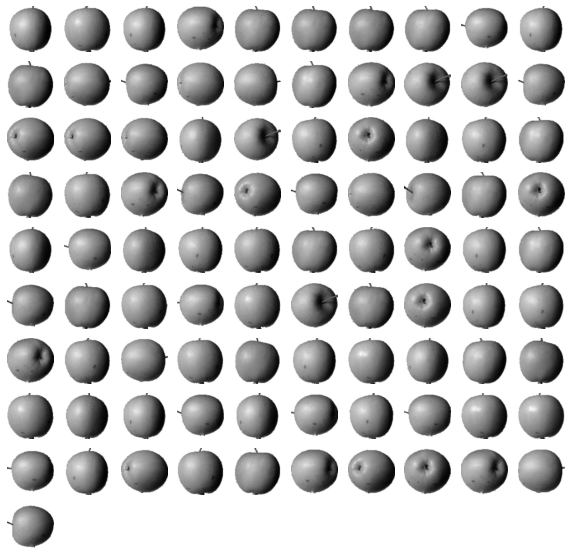

In [22]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')

- 차원을 줄이면 시각화하기 좋음

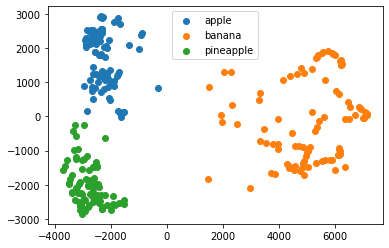

In [23]:
for label in range(0, 3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

- 사과와 파인애플은 좀 붙어있어서 혼동하기 쉬울 거심